In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("C:\\Users\\MUkesh Singh\\prashant sir\\machine learnig\\supervised learning\\self project\\kaggle\\multi linear regression\\CarPrice.csv")
data

In [45]:
df=data.copy()

In [46]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [48]:
df.shape

(205, 26)

# Data preprocessing

In [49]:
df.drop(["car_ID","symboling","CarName"],inplace=True,axis=1)

In [50]:
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [25]:
x = df.iloc[ :, :-1].values
y = df.iloc[ :, 4].values

# null value find

In [26]:
df.isnull().sum()

fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# convert categorical to numeric

In [51]:
df.select_dtypes(object)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
for column in df:
    df[column] = LabelEncoder().fit_transform(df[column])

df


,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,2,22,8,1,...,18,5,23,4,13,30,10,8,10,118
1,1,0,1,0,2,0,2,22,8,1,...,18,5,23,4,13,30,10,8,10,137
2,1,0,1,2,2,0,10,29,16,13,...,28,5,1,28,13,45,10,6,9,137
3,1,0,0,3,1,0,30,45,21,25,...,11,5,13,25,22,27,16,11,13,123
4,1,0,0,3,0,0,28,45,23,25,...,22,5,13,25,5,33,16,5,5,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,3,2,0,46,63,34,34,...,24,5,35,15,20,32,15,10,11,143
201,1,1,0,3,2,0,46,63,33,34,...,24,5,35,15,11,48,14,6,8,161
202,1,0,0,3,2,0,46,63,34,34,...,33,5,26,7,12,38,16,5,6,165
203,0,1,0,3,2,0,46,63,34,34,...,25,3,6,25,31,28,8,13,10,167


In [30]:
df.corr()["price"].sort_values()

highwaympg         -0.813222
citympg            -0.806431
fueltype           -0.140119
compressionratio   -0.135919
doornumber         -0.115160
peakrpm            -0.091529
enginetype         -0.023271
carbody             0.006444
cylindernumber      0.045351
stroke              0.102965
enginelocation      0.200113
carheight           0.249139
aspiration          0.307676
drivewheel          0.600088
boreratio           0.627766
wheelbase           0.685544
fuelsystem          0.707890
carlength           0.802523
carwidth            0.815487
enginesize          0.818392
horsepower          0.846130
curbweight          0.905891
price               1.000000
Name: price, dtype: float64

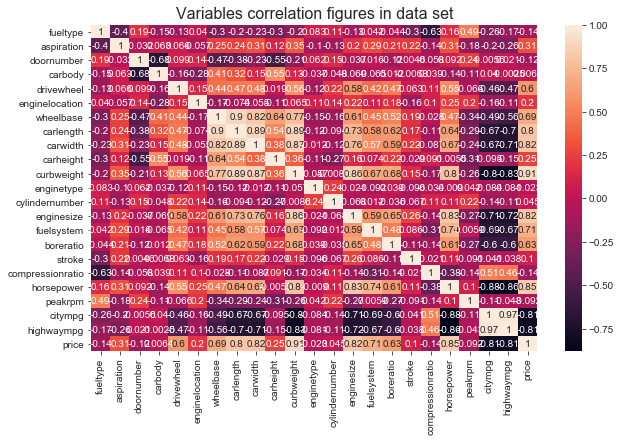

In [31]:
corr_data = df.corr()

sns.set_style('ticks')
plt.figure(figsize=(10,6))
plt.title('Variables correlation figures in data set', fontsize=16)

sns.heatmap(corr_data, annot=True)

plt.show()

# train test split


In [33]:
x = df.drop(["price"],axis = 1)
y = df["price"]

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=143)





In [35]:

from sklearn.linear_model import LinearRegression
mlrm = LinearRegression()

mlrm.fit(x_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
mlrm.score(x_train, y_train)*100

90.93942572900102

In [37]:
X_val, X_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.3, random_state=0)

In [40]:
mlrm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
mlrm.score(X_test, y_test)

0.8246387705288118

In [42]:
import statsmodels.api as sm
mod = sm.OLS(y_train, x_train)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              204.2
Date:                Fri, 29 Jan 2021   Prob (F-statistic):                    7.12e-85
Time:                        14:50:32   Log-Likelihood:                         -603.42
No. Observations:                 143   AIC:                                      1251.
Df Residuals:                     121   BIC:                                      1316.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------